In [1]:
import Parameters
import PGAgent
import InputTrafficGeneration
import Envirement
from  Envirement import Envirement as env
import LearnPGagent as lpg

import numpy as np
import random
import math
from collections import deque
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam

Using TensorFlow backend.


In [2]:
# Start learning process
# for this simulation it was taken: UE=7, QCI_n = 3, CQI is randomly generated for each RBG and SF

SF = 300000             # number of SF for learning process
sfi_train = 1           # how often model wil be traind - number of SF
sfi_save = 10000        # how often to save trained model
sfi_show_reward = 10000  # how often to show results

rew_sf_rand, rew_sf_DQN, rew_sf_BestCQI = lpg.LearnProcessPgagent(SF,sfi_train,sfi_save,sfi_show_reward)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 84)                3612      
_________________________________________________________________
dense_2 (Dense)              (None, 21)                1785      
Total params: 5,397
Trainable params: 5,397
Non-trainable params: 0
_________________________________________________________________
SFI:  0 rewardRAND:  0.39111111111111113
SFI:  0 rewardDQN:  0.4266666666666667
SFI:  0 rewardBestCQI:  0.88
SFI:  10000 rewardRAND:  0.48444444444444446
SFI:  10000 rewardDQN:  0.8933333333333333
SFI:  10000 rewardBestCQI:  0.9066666666666666
SFI:  20000 rewardRAND:  0.39555555555555555
SFI:  20000 rewardDQN:  0.8933333333333333
SFI:  20000 rewardBestCQI:  0.9066666666666666
SFI:  30000 rewardRAND:  0.3511111111111111
SFI:  30000 rewardDQN:  0.92
SFI:  30000 rewardBestCQI:  0.9333333333333333
SFI:  40000 rewardRAND:  0.3066666666

/opt/notebook/ml-store/ZDV/Дисер/RL/deeprm/PGAgent.py:54: RuntimeWarning: invalid value encountered in true_divide
  prob = (( (abs(x[:,0])+1) + abs(x[:,2]) ) *( abs(x[:,1])/x[:,1])).max()
/home/ml/.local/lib/python3.6/site-packages/numpy/core/_methods.py:26: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims)
/opt/notebook/ml-store/ZDV/Дисер/RL/deeprm/PGAgent.py:55: RuntimeWarning: invalid value encountered in true_divide
  action_BestCQI = (( (abs(x[:,0])+1) + abs(x[:,2]) ) *( abs(x[:,1])/x[:,1])).argmax(axis=0)


SFI:  50000 rewardRAND:  0.36
SFI:  50000 rewardDQN:  0.8533333333333334
SFI:  50000 rewardBestCQI:  0.8666666666666667
SFI:  60000 rewardRAND:  0.4311111111111111
SFI:  60000 rewardDQN:  0.8933333333333333
SFI:  60000 rewardBestCQI:  0.92
SFI:  70000 rewardRAND:  0.3688888888888889
SFI:  70000 rewardDQN:  0.84
SFI:  70000 rewardBestCQI:  0.8527876984126984
SFI:  80000 rewardRAND:  0.39555555555555555
SFI:  80000 rewardDQN:  0.92
SFI:  80000 rewardBestCQI:  0.92
SFI:  90000 rewardRAND:  0.3022222222222222
SFI:  90000 rewardDQN:  0.8933333333333333
SFI:  90000 rewardBestCQI:  0.8933333333333333
SFI:  100000 rewardRAND:  0.44
SFI:  100000 rewardDQN:  0.88
SFI:  100000 rewardBestCQI:  0.8933333333333333
SFI:  110000 rewardRAND:  0.4533333333333333
SFI:  110000 rewardDQN:  0.88
SFI:  110000 rewardBestCQI:  0.92
SFI:  120000 rewardRAND:  0.3333333333333333
SFI:  120000 rewardDQN:  0.8666666666666667
SFI:  120000 rewardBestCQI:  0.8933333333333333
SFI:  130000 rewardRAND:  0.36
SFI:  130000 

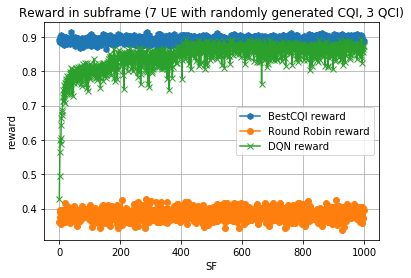

In [13]:
# Learning process for PGagent

import matplotlib.pyplot as plt
leng = 10000
x_rand = rew_sf_rand[0:leng]
x_DQN = rew_sf_DQN[0:leng]
x_BestCQI = rew_sf_BestCQI[0:leng]
sf_avg = 10
avg_reward_rand =[(x_rand[j:j+sf_avg].sum())/sf_avg for j in range(0,len(x_rand),sf_avg)]
avg_reward_rand = np.array(avg_reward_rand)
avg_reward_DQN =[(x_DQN[j:j+sf_avg].sum())/sf_avg for j in range(0,len(x_DQN),sf_avg)]
avg_reward_DQN = np.array(avg_reward_DQN)
avg_reward_BestCQI =[(x_BestCQI[j:j+sf_avg].sum())/sf_avg for j in range(0,len(x_BestCQI),sf_avg)]
avg_reward_BestCQI = np.array(avg_reward_BestCQI)
i = np.arange(0,len(avg_reward_DQN),1)
y_rand = avg_reward_rand[i]
y_DQN = avg_reward_DQN[i]
y_BestCQI = avg_reward_BestCQI[i]

plt.title("Reward in subframe (7 UE with randomly generated CQI, 3 QCI)")
plt.xlabel("SF")
plt.ylabel("reward") 
plt.grid()
plt.plot(i, y_BestCQI, label='BestCQI reward',marker='h') 
plt.plot(i, y_rand, label='Round Robin reward',marker='o')
plt.plot(i, y_DQN, label='PGagent reward',marker='x')
plt.legend()
